In [1]:
import pandas as pd
import sys

sys.path.append("../..")
from common.utils import timestep_csv_names

In [2]:
import os
root_dir = "../../../data/one_day_data/"
assert os.path.exists(root_dir)

In [3]:
_timestep_csv_names = timestep_csv_names(delta=10)

target_col = "RH1"
dates, values = [], []
for year in os.listdir(root_dir):
    for month in os.listdir(root_dir + f"/{year}"):
        for date in os.listdir(root_dir + f"/{year}/{month}"):
            _values = []
            minimum_data_length = 40
            start_time = "0-0"
            for csv_filename in _timestep_csv_names:
                csv_path = os.path.join(
                        root_dir,
                        year, month, date, csv_filename
                    )
                parquet_path = csv_path.replace(".csv", ".parquet.gzip")
                parquet_df = pd.read_parquet(parquet_path, engine="pyarrow")

                _values.append(parquet_df[target_col].max())
                _values.append(parquet_df[target_col].min())

                if len(parquet_df.index) < minimum_data_length:
                    minimum_data_length = len(parquet_df.index)

            if minimum_data_length > 0:
                dates.append(date)
                values.append(max(_values) if max(_values) < 100 else 100)

                dates.append(date)
                values.append(min(_values))

df = pd.DataFrame({"date": dates, target_col: values})
df = df.sort_values(by="date")
df.reset_index()
df.head()

,date,RH1
712,2019-10-01,89.0
713,2019-10-01,39.4
710,2019-10-02,90.2
711,2019-10-02,39.0
721,2019-10-03,26.3


In [4]:
df["month"] = df["date"].apply(lambda x: x.split("-")[0] + "-" + x.split("-")[1])
df.head()

,date,RH1,month
712,2019-10-01,89.0,2019-10
713,2019-10-01,39.4,2019-10
710,2019-10-02,90.2,2019-10
711,2019-10-02,39.0,2019-10
721,2019-10-03,26.3,2019-10


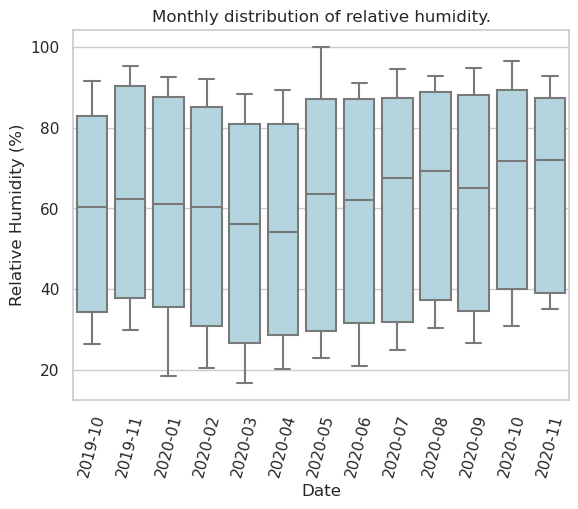

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=df, x="month", y=target_col, color="lightblue")
plt.xticks(rotation=75)
ax.set_title("Monthly distribution of relative humidity.")
ax.set_ylabel("Relative Humidity (%)")
ax.set_xlabel("Date")

plt.savefig("./humidity.png")
plt.show()
plt.close()

In [7]:
import numpy as np
df["RH1"] = np.where(df["RH1"] > 100, 100, df["RH1"])